In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import poisson 
import cvxpy as cp

from apprenticheshiplearning.problems.inventory import Inventory
from apprenticheshiplearning.classes.solver import SolverMdp, SolverSMD

### Setting

In [2]:
max_inventory = 15
demand_lambda = 10
holding_cost = 0.5
order_cost = 3
selling_price = 15
gamma = 0.9

In [3]:
inventory = Inventory(max_inventory, demand_lambda, selling_price, holding_cost, order_cost, gamma)
inventory.get_mdp_forward()

Cost range:  -129.9812290598009 0.0


In [4]:
mini = -130
maxi = 0

### Forward

#### Optimal

In [5]:
solver_expert = SolverMdp(inventory.mdp_forward)
prob, mu_e = solver_expert.solve()
policy_e = inventory.mdp_forward.get_policy_from_mu(mu_e.value)

n = len(inventory.mdp_forward.S)
visualize_policy = np.zeros(n)
for i in range(n):
    visualize_policy[i] = np.argmax(policy_e[i])

print("Optimal policy:", visualize_policy)
mu_optimal = mu_e.value
mu_optimal = np.maximum(mu_optimal, 0)
mu_optimal = mu_optimal/np.sum(mu_optimal)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Dec 24 07:43:53 PM: Your problem has 256 variables, 272 constraints, and 0 parameters.
(CVXPY) Dec 24 07:43:53 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 24 07:43:53 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 24 07:43:53 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 24 07:43:53 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 24 07:43:53 PM: Compiling problem (target solver=CLARABEL

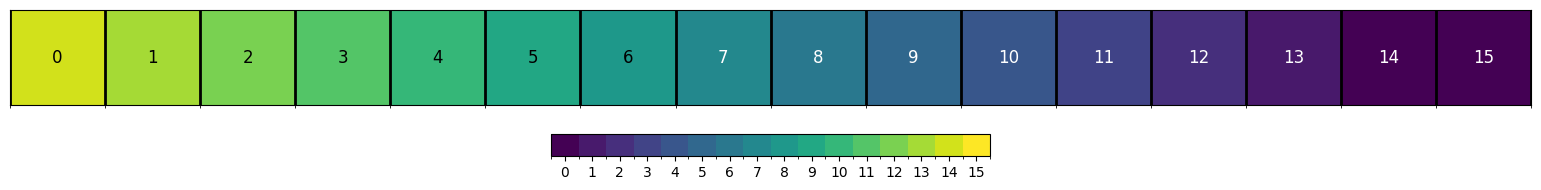

In [6]:
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

#### Suboptimal

In [111]:
max_inventory_sub = 15
demand_lambda_sub = 10
holding_cost_sub = 8
order_cost_sub = 5
selling_price_sub = 15
gamma_sub = 0.9
inventory_sub = Inventory(max_inventory_sub, 
                          demand_lambda_sub, 
                          selling_price_sub, 
                          holding_cost_sub, 
                          order_cost_sub, 
                          gamma_sub,
                          min_scaling=mini,
                          max_scaling=maxi)
inventory_sub.get_mdp_forward()

In [112]:
solver_expert = SolverMdp(inventory_sub.mdp_forward)
prob, mu_e = solver_expert.solve()
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu_e.value)

n = len(inventory_sub.mdp_forward.S)
visualize_policy_sub = np.zeros(n)
for i in range(n):
    visualize_policy_sub[i] = np.argmax(policy_e[i])

print("Suboptimal policy:", visualize_policy_sub)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Dec 23 02:34:00 PM: Your problem has 256 variables, 272 constraints, and 0 parameters.
(CVXPY) Dec 23 02:34:00 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 23 02:34:00 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 23 02:34:00 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 23 02:34:00 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 23 02:34:00 PM: Compiling problem (target solver=CLARABEL

In [113]:
mu_expert = mu_e.value
mu_expert = np.maximum(mu_expert, 0)
mu_expert = mu_expert/np.sum(mu_expert)

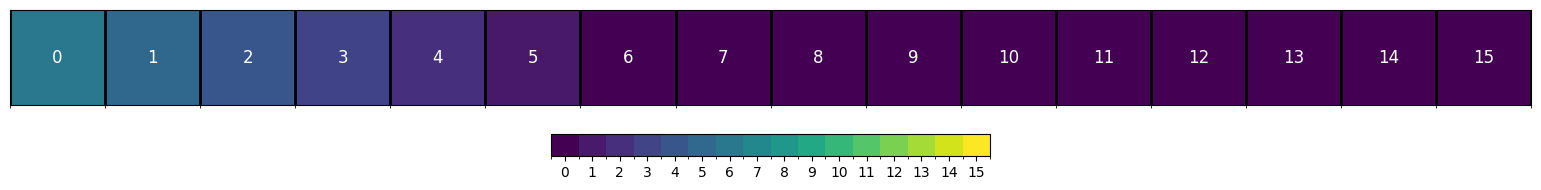

In [114]:
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_sub.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

#### SMD

In [174]:
def cost_est(s, a, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est):
    expected_income = np.sum([sell_price_est * min(s + a, d) * poisson.pmf(d, demand_lambda_est) for d in range(max_inventory + 1)])
    ordering_cost = order_cost_est * a
    holding_cost = holding_cost_est * (s + a)
    return ordering_cost + holding_cost - expected_income

def get_c_hat(S, A, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est):
        c = np.zeros((len(S) * len(A)))
        for s in S:
            for a in A:
                c[s + len(S) * a] = cost_est(s, a, sell_price_est, demand_lambda_est, order_cost_est, holding_cost_est)
        return c

selling_price_est = 14
order_cost_est = 4
holding_cost_est = 2
c_hat = get_c_hat(inventory.mdp_forward.S, inventory.mdp_forward.A, selling_price_est, demand_lambda, order_cost_est, holding_cost_est)
c_hat = 2 * (c_hat - mini) / (maxi- mini) - 1

In [175]:
alpha = 0.1#0.3
mu_e = mu_e
c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
u_0 = np.zeros(len(inventory.mdp_forward.S))
mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
T = 10000 #10000
N = 1000 #100

In [176]:
solver_smd = SolverSMD(inventory, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_smd.solve_expected(N, graphics=False)

Simulation 1/1000
Simulation 2/1000
Simulation 3/1000
Simulation 4/1000
Simulation 5/1000
Simulation 6/1000
Simulation 7/1000
Simulation 8/1000
Simulation 9/1000
Simulation 10/1000
Simulation 11/1000
Simulation 12/1000
Simulation 13/1000
Simulation 14/1000
Simulation 15/1000
Simulation 16/1000
Simulation 17/1000
Simulation 18/1000
Simulation 19/1000
Simulation 20/1000
Simulation 21/1000
Simulation 22/1000
Simulation 23/1000
Simulation 24/1000
Simulation 25/1000
Simulation 26/1000
Simulation 27/1000
Simulation 28/1000
Simulation 29/1000
Simulation 30/1000
Simulation 31/1000
Simulation 32/1000
Simulation 33/1000
Simulation 34/1000
Simulation 35/1000
Simulation 36/1000
Simulation 37/1000
Simulation 38/1000
Simulation 39/1000
Simulation 40/1000
Simulation 41/1000
Simulation 42/1000
Simulation 43/1000
Simulation 44/1000
Simulation 45/1000
Simulation 46/1000
Simulation 47/1000
Simulation 48/1000
Simulation 49/1000
Simulation 50/1000
Simulation 51/1000
Simulation 52/1000
Simulation 53/1000
Si

Learned policy: [14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  1.  1.  2.  1.  1.]


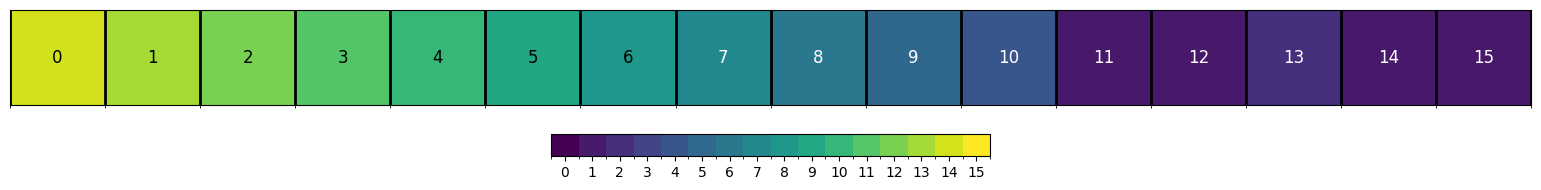

In [179]:
policy_e = inventory_sub.mdp_forward.get_policy_from_mu(mu)
n = len(inventory_sub.mdp_forward.S)
visualize_policy_smd = np.zeros(n)
for i in range(n):
    visualize_policy_smd[i] = np.argmax(policy_e[i])
print("Learned policy:", visualize_policy_smd)
plt.rcParams.update(plt.rcParamsDefault)

data = visualize_policy_smd.reshape(1, -1)
fig, ax = plt.subplots(figsize=(16, 2))

bounds = np.arange(-0.5, 16.5, 1)


cmap = plt.get_cmap('viridis', 16) 
norm = mcolors.BoundaryNorm(bounds, cmap.N)

im = ax.imshow(data, cmap=cmap, norm=norm, aspect='equal')

for i in range(data.shape[1]):
    val = data[0, i]
    text_color = 'white' if val < 8 else 'black'
    
    # Adjusted position slightly to center in the grid box
    ax.text(i, 0, str(i), ha='center', va='center', color=text_color, fontsize=12)

# Update grid ticks to match the shape of data
ax.set_xticks(np.arange(-0.5, data.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, 1, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='major', bottom=False, left=False, labelbottom=False, labelleft=False)

# 4. Configure the colorbar with ticks centered on the integers
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=np.arange(0, 16))
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [181]:
def estimate_inventory_costs(mdp, cost_vector, demand_lambda, mini, maxi):
    data_points = []
    for i in range(len(cost_vector)):
        s,a = mdp.get_sa_from_index(i)
        data_points.append((s, a, ((cost_vector[i] +1) / 2) * (maxi - mini) + mini))

    def calculate_expected_sales(s, a):
        expected_sales = 0.0
        for d in range(len(mdp.S)):
            sales = min(s + a, d)
            expected_sales += sales * poisson.pmf(d, demand_lambda)
        return expected_sales
    
    N = len(data_points)

    A = np.zeros((N, 3))
    b = np.zeros(N)

    for i, (s, a, cost) in enumerate(data_points):
        # A matrix columns: [C_order (a), C_hold (s+a), C_sell (-E[sales])]
        A[i, 0] = a                     # Coefficient for order_cost
        A[i, 1] = s + a                 # Coefficient for holding_cost
        A[i, 2] = -calculate_expected_sales(s, a) # Coefficient for sell_price
        
        b[i] = cost

    x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
    return x.tolist()

estimated_costs = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
print("Estimated Costs (order_cost, holding_cost, sell_price):", estimated_costs)

Estimated Costs (order_cost, holding_cost, sell_price): [3.3814173387618163, 2.3100955786572417, 14.112339554100835]


### Ablation c_hat

In [62]:
def ablation_chat(inventory, 
                  alpha,
                  T,
                  N,
                  mu_optimal, 
                  epsilons, 
                  holding_cost, 
                  order_cost, 
                  selling_price, 
                  demand_lambda,
                  mini,
                  maxi, 
                  sims=5):
    results_l1 = []
    results_l2 = []
    results_linf = []
    results_order_cost = []
    results_holding_cost = []
    results_selling_price = []
    results_apprentice_expectedcost = []
    for epsilon in epsilons:
        avg_order_cost = 0
        avg_holding_cost = 0
        avg_selling_price = 0
        avg_l1 = 0
        avg_l2 = 0
        avg_linf = 0
        avg_apprentice_expectedcost = 0
        for i in range(sims):
            selling_price_est = selling_price + epsilon*1.5 * np.random.uniform(-1, 1)
            order_cost_est = order_cost + epsilon*0.3 * np.random.uniform(-1, 1)
            holding_cost_est = holding_cost + epsilon*0.05 * np.random.uniform(-1, 1)
            c_hat = get_c_hat(inventory.mdp_forward.S, inventory.mdp_forward.A, selling_price_est, demand_lambda, order_cost_est, holding_cost_est)
            c_hat = 2 * (c_hat - mini) / (maxi - mini) - 1
            c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
            u_0 = np.zeros(len(inventory.mdp_forward.S))
            mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))

            solver_smd = SolverSMD(inventory, c_hat, alpha, mu_optimal, c_0, u_0, mu_0, 1e-2, 1e-2, T)
            c, u, mu = solver_smd.solve_expected(N, graphics=False)

            order_cost, holding_cost, sell_price = estimate_inventory_costs(inventory.mdp_forward, c, demand_lambda, mini, maxi)
            avg_order_cost += order_cost
            avg_holding_cost += holding_cost
            avg_selling_price += sell_price

            avg_l1 += np.linalg.norm(c - inventory.mdp_forward.c, 1)
            avg_l2 += np.linalg.norm(c - inventory.mdp_forward.c, 2)
            avg_linf += np.linalg.norm(c - inventory.mdp_forward.c, np.inf)
            avg_apprentice_expectedcost += mu @ inventory.mdp_forward.c

        avg_order_cost /= sims
        avg_holding_cost /= sims
        avg_selling_price /= sims
        avg_l1 /= sims
        avg_l2 /= sims
        avg_linf /= sims
        results_order_cost.append(avg_order_cost)
        results_holding_cost.append(avg_holding_cost)
        results_selling_price.append(avg_selling_price)
        
        results_l1.append(avg_l1)
        results_l2.append(avg_l2)
        results_linf.append(avg_linf)

        results_apprentice_expectedcost.append(avg_apprentice_expectedcost)

    return results_l1, results_l2, results_linf, results_order_cost, results_holding_cost, results_selling_price, results_apprentice_expectedcost


In [63]:
epsilons = np.linspace(0, 10, 100)

alpha = 0.1
c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
u_0 = np.zeros(len(inventory.mdp_forward.S))
mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
T = 10000
N = 20

ablation_results_alpha01 = ablation_chat(inventory, alpha, T, N, mu_optimal, epsilons, holding_cost, order_cost, selling_price, demand_lambda, mini, maxi)
with open('new_ablation_results_alpha01.pkl', 'wb') as f:
    pickle.dump(ablation_results_alpha01, f)

alpha = 0.3
ablation_results_alpha03 = ablation_chat(inventory, alpha, T, N, mu_optimal, epsilons, holding_cost, order_cost, selling_price, demand_lambda, mini, maxi)
with open('new_ablation_results_alpha03.pkl', 'wb') as f:
    pickle.dump(ablation_results_alpha03, f)

alpha = 0.5
ablation_results_alpha05 = ablation_chat(inventory, alpha, T, N, mu_optimal, epsilons, holding_cost, order_cost, selling_price, demand_lambda, mini, maxi)
with open('new_ablation_results_alpha05.pkl', 'wb') as f:
    pickle.dump(ablation_results_alpha05, f)

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulat

In [88]:
# load the pickles
with open('output/new_ablation_results_alpha01.pkl', 'rb') as f:
    ablation_results_alpha01 = pickle.load(f)
with open('output/new_ablation_results_alpha03.pkl', 'rb') as f:
    ablation_results_alpha03 = pickle.load(f)
with open('output/new_ablation_results_alpha05.pkl', 'rb') as f:
    ablation_results_alpha05 = pickle.load(f)
epsilons = np.linspace(0, 10, 100)

In [89]:
l_1, l_2, l_inf, results_order_cost, results_holding_cost, results_selling_price, apprentice_expected = ablation_results_alpha01

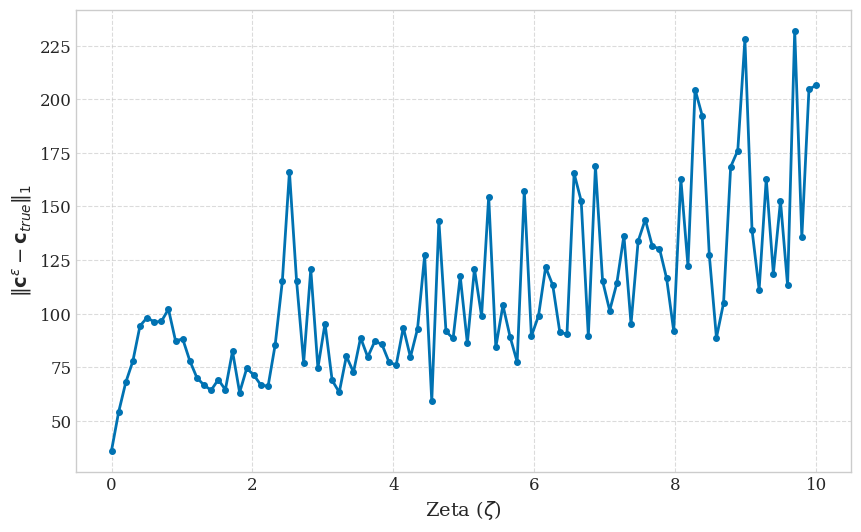

In [98]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'lines.linewidth': 2
})
colors = ['#0072B2', '#D55E00', '#009E73']

plt.figure(figsize=(10, 6))

# 4. Plot with distinct colors, markers, and linestyles
#make smaller markers

plt.plot(epsilons, l_1, marker='o', color=colors[0], markersize=4, linestyle='-', label='L1')
#plt.plot(epsilons, l_2, marker='o', color=colors[1], markersize=4, label='$L^2$')
#plt.plot(epsilons, l_inf, marker='o', color=colors[2], markersize=4, label='$L^\infty$')

# 5. formatted labels
plt.xlabel(r'Zeta ($\zeta$)', fontsize=14)
plt.ylabel(r'$\Vert \mathbf{c}^{\epsilon} - \mathbf{c}_{true} \Vert_1$', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend(frameon=True, fancybox=False, edgecolor='black')

plt.show()

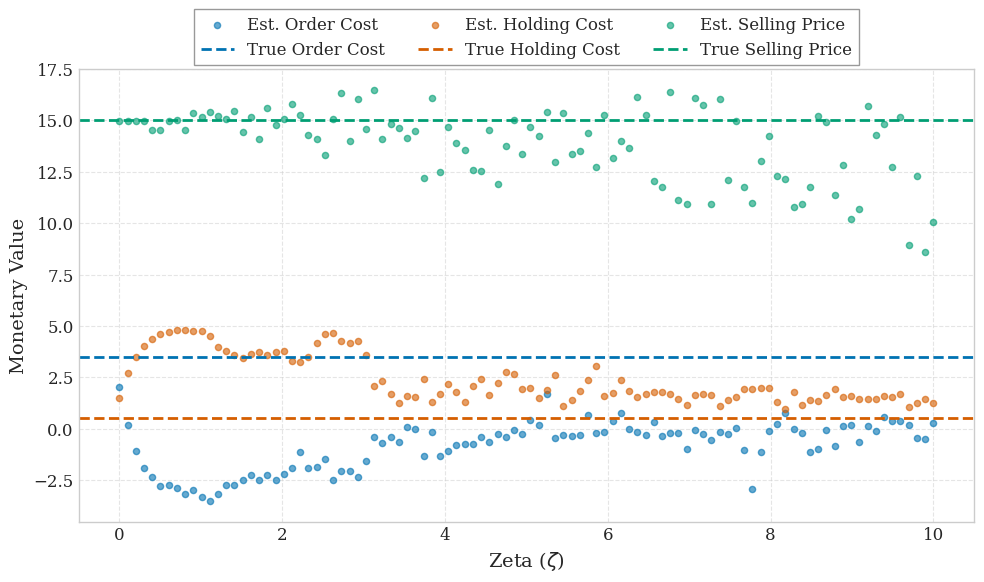

In [99]:
colors = {
    'order': '#0072B2',   # Blue
    'holding': '#D55E00', # Vermillion
    'selling': '#009E73'  # Green
}

plt.figure(figsize=(10, 6))

marker_alpha = 0.6
marker_size = 20

plt.scatter(epsilons, results_order_cost, label='Est. Order Cost', 
            color=colors['order'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=order_cost, color=colors['order'], linestyle='--', label='True Order Cost')

plt.scatter(epsilons, results_holding_cost, label='Est. Holding Cost', 
            color=colors['holding'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=holding_cost, color=colors['holding'], linestyle='--', label='True Holding Cost')

plt.scatter(epsilons, results_selling_price, label='Est. Selling Price', 
            color=colors['selling'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=selling_price, color=colors['selling'], linestyle='--', label='True Selling Price')

plt.xlabel(r'Zeta ($\zeta$)', fontsize=14)
plt.ylabel('Monetary Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, fancybox=False, edgecolor='black', ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=True, fancybox=False, edgecolor='gray')


plt.tight_layout()
plt.show()

### Ablation alpha suboptimal expert

In [31]:
def get_muA(c, inventory):
    mu_A = cp.Variable(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    objective = cp.Minimize(
                            c @ mu_A
                            )
    constraints = [mu_A >= 0,
                    (inventory.mdp_forward.T @ mu_A) == inventory.mdp_forward.v]
    problem = cp.Problem(objective, constraints)

    solver_kwargs = {"verbose": False}
    problem.solve(cp.CLARABEL, **solver_kwargs)
    return mu_A.value

In [32]:
alphas = np.linspace(0, 0.5, 100)


recovered_costs = []
dec_true_muepsilon = []
dec_true_muexpert = []
dec_true_mu_optimal = []
dec_cepsilon_muexpert = []
dec_cepsilon_muepsilon = []
dec_cepsilon_mu_cepsilon_optimal = []
l2_chat_cepsilon = []

for alpha in alphas:
    mu_e = mu_expert
    c_0 = np.zeros(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    u_0 = np.zeros(len(inventory.mdp_forward.S))
    mu_0 = np.ones(len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A)) / (len(inventory.mdp_forward.S) * len(inventory.mdp_forward.A))
    T = 10000
    N = 20
    solver_smd = SolverSMD(inventory, inventory.c, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T) #1e-2, 1e-2
    
    c_epsilon, u, mu_epsilon = solver_smd.solve_expected(N, graphics=False)
    mu_A = get_muA(c, inventory)
    mu_proj = inventory.mdp_forward.project_to_policy_space(mu_epsilon)

    order_cost, holding_cost, sell_price = estimate_inventory_costs(inventory.mdp_forward, c_epsilon, demand_lambda, mini, maxi)
    recovered_costs.append((order_cost, holding_cost, sell_price))

    dec_true_muepsilon.append(inventory.mdp_forward.policy_evaluation(mu_epsilon, inventory.c))
    dec_true_muexpert.append(mu_e @ inventory.c)
    dec_true_mu_optimal.append(mu_optimal @ inventory.c)
    dec_cepsilon_muexpert.append(mu_e @ c_epsilon)
    dec_cepsilon_muepsilon.append(inventory.mdp_forward.policy_evaluation(mu_epsilon, c_epsilon))
    dec_cepsilon_mu_cepsilon_optimal.append(get_muA(c_epsilon, inventory) @ c_epsilon)
    l2_chat_cepsilon.append(np.linalg.norm(c_epsilon - inventory.c, ord=2))

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20
Simulat

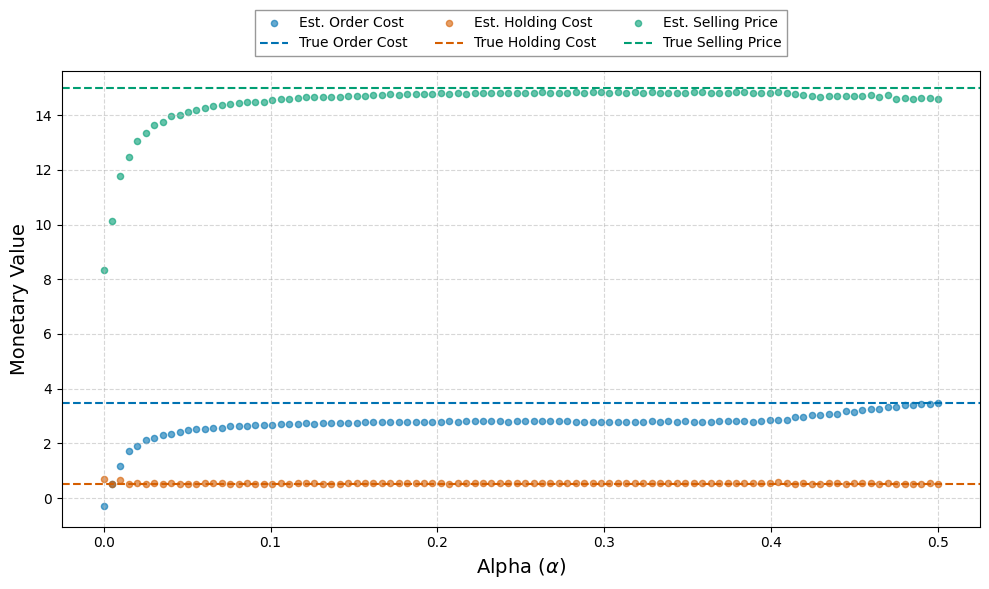

In [82]:
results_order_cost = [cost[0] for cost in recovered_costs]
results_holding_cost = [cost[1] for cost in recovered_costs]
results_selling_price = [cost[2] for cost in recovered_costs]

colors = {
    'order': '#0072B2',   # Blue
    'holding': '#D55E00', # Vermillion
    'selling': '#009E73'  # Green
}

plt.figure(figsize=(10, 6))

marker_alpha = 0.6
marker_size = 20

plt.scatter(alphas, results_order_cost, label='Est. Order Cost', 
            color=colors['order'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=order_cost, color=colors['order'], linestyle='--', label='True Order Cost')

plt.scatter(alphas, results_holding_cost, label='Est. Holding Cost', 
            color=colors['holding'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=holding_cost, color=colors['holding'], linestyle='--', label='True Holding Cost')

plt.scatter(alphas, results_selling_price, label='Est. Selling Price', 
            color=colors['selling'], alpha=marker_alpha, marker='o', s=marker_size)
plt.axhline(y=selling_price, color=colors['selling'], linestyle='--', label='True Selling Price')

plt.xlabel(r'Alpha ($\alpha$)', fontsize=14)
plt.ylabel('Monetary Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, fancybox=False, edgecolor='black', ncol=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=True, fancybox=False, edgecolor='gray')


plt.tight_layout()
plt.show()

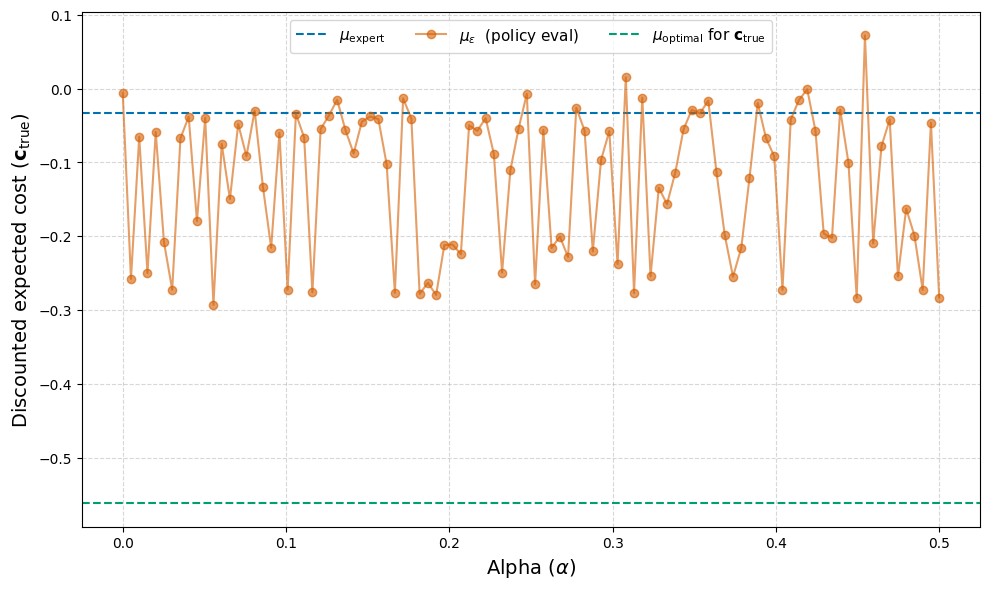

In [72]:
plt.figure(figsize=(10, 6))
plt.axhline(dec_true_muexpert[0], label=r'$\mu_{\text{expert}}$', color=colors['order'], linestyle='--')
plt.plot(alphas, dec_true_muepsilon, label=r'$\mu_\epsilon$  (policy eval)', color=colors['holding'], marker='o', alpha=0.6)
dec_optimal_true = mu_optimal @ inventory.c
plt.axhline(dec_true_mu_optimal[0], label=r"$\mu_{\text{optimal}}$ for $\mathbf{c}_{\text{true}}$", color=colors['selling'],linestyle='--')



plt.xlabel(r'Alpha ($\alpha$)', fontsize=14)
plt.ylabel(r'Discounted expected cost ($\mathbf{c}_{\text{true}}$)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper center', ncol=3, fontsize=11)
plt.show()

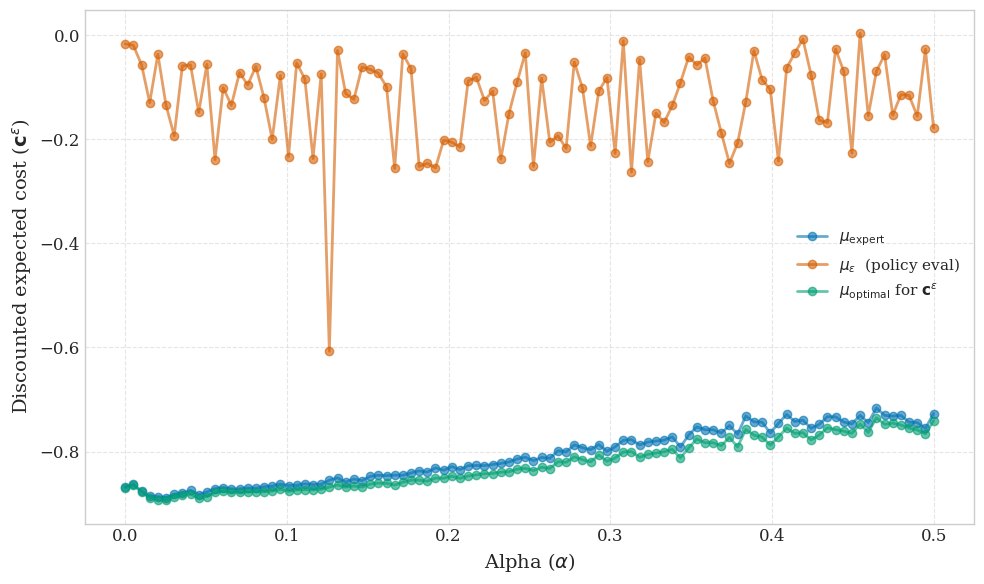

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, dec_cepsilon_muexpert, label=r'$\mu_{\text{expert}}$', color=colors['order'], marker='o', alpha=0.6)
plt.plot(alphas, dec_cepsilon_muepsilon, label=r'$\mu_\epsilon$  (policy eval)', color=colors['holding'], marker='o', alpha=0.6)
plt.plot(alphas, dec_cepsilon_mu_cepsilon_optimal, label=r"$\mu_{\text{optimal}}$ for $\mathbf{c}^{\epsilon}$", color=colors['selling'], marker='o', alpha=0.6)
plt.xlabel(r'Alpha ($\alpha$)', fontsize=14)
plt.ylabel(r'Discounted expected cost ($\mathbf{c}^{\epsilon}$)',fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

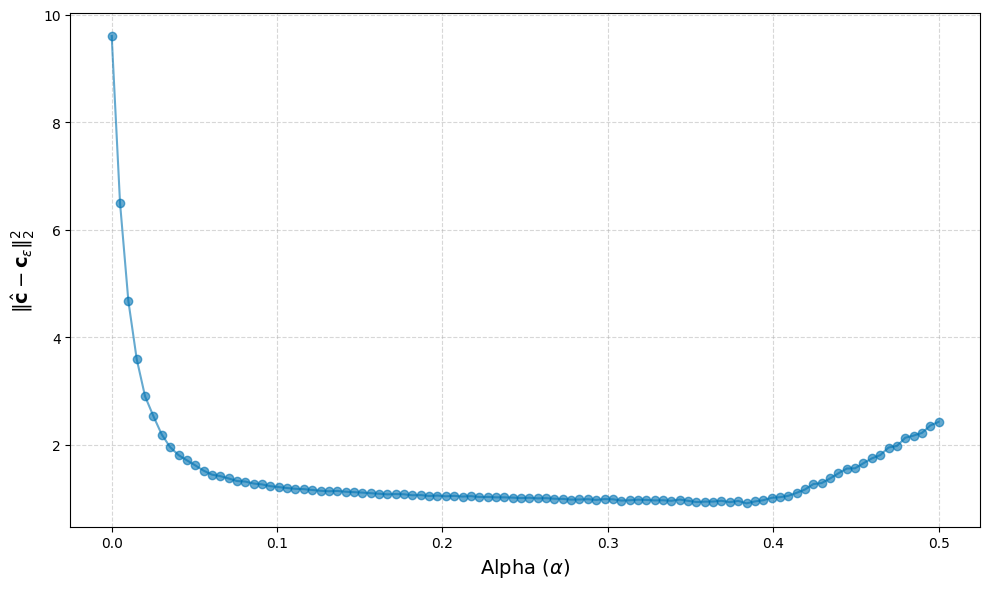

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, l2_chat_cepsilon, color=colors['order'], marker='o', alpha=0.6)
plt.xlabel(r'Alpha ($\alpha$)', fontsize=14)
plt.ylabel(r'$\Vert \hat{\mathbf{c}} - \mathbf{c}_{\epsilon} \Vert_2^2$', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

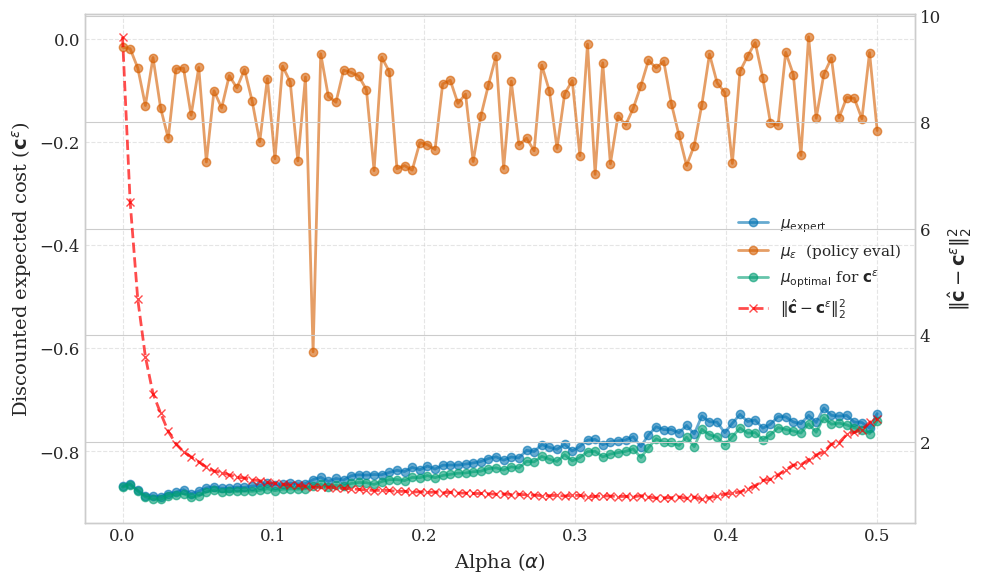

In [103]:

# Create the figure and the primary axis (ax1)
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Plotting the first set of graphs on the left Y-axis ---
# Note: plot returns a list, so we unwrap it into variables for the legend later
l1, = ax1.plot(alphas, dec_cepsilon_muexpert, label=r'$\mu_{\text{expert}}$', 
               color=colors['order'], marker='o', alpha=0.6)
l2, = ax1.plot(alphas, dec_cepsilon_muepsilon, label=r'$\mu_\epsilon$  (policy eval)', 
               color=colors['holding'], marker='o', alpha=0.6)
l3, = ax1.plot(alphas, dec_cepsilon_mu_cepsilon_optimal, label=r"$\mu_{\text{optimal}}$ for $\mathbf{c}^{\epsilon}$", 
               color=colors['selling'], marker='o', alpha=0.6)

ax1.set_xlabel(r'Alpha ($\alpha$)', fontsize=14)
ax1.set_ylabel(r'Discounted expected cost ($\mathbf{c}^{\epsilon}$)', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.5)

# --- Creating the secondary axis (ax2) sharing the same X-axis ---
ax2 = ax1.twinx()

# Plotting the second graph on the right Y-axis
# I added a linestyle='--' and a different marker to distinguish it from the 'order' color line on ax1
l4, = ax2.plot(alphas, l2_chat_cepsilon, label=r'$\Vert \hat{\mathbf{c}} - \mathbf{c}^{\epsilon} \Vert_2^2$', 
              color='r', marker='x', linestyle='--', alpha=0.7)

ax2.set_ylabel(r'$\Vert \hat{\mathbf{c}} - \mathbf{c}^{\epsilon} \Vert_2^2$', fontsize=14)

# --- Combining legends from both axes ---
lines = [l1, l2, l3, l4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=11, loc='best')

plt.tight_layout()
plt.show()